# Aula 3 - Bootcamp DataScience

In [212]:
#Lendo o pacote de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

## Distribuição Normal

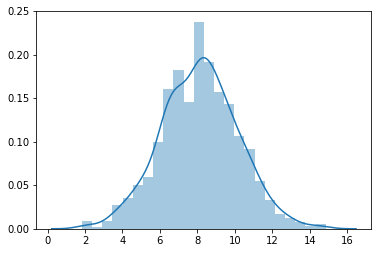

In [255]:
#Vamos gerar os dados
media = 8
std = 2
norm = sct.norm.rvs(loc=media, scale=std, size=1000) # loc é a média, scale é o desvio padrão. 

sns.distplot(norm);

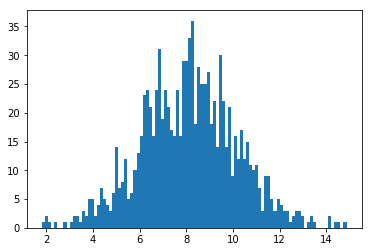

In [256]:
plt.hist(norm, bins = 100)
plt.show()

In [275]:
(norm.mean(), norm.std())

(8.127935831587738, 2.050111932611128)

In [276]:
np.median(norm)

8.161120438662085

In [273]:
np.quantile(norm, 0.50)

8.161120438662085

In [258]:
#Para saber a probabilidade acumulada para valores menores que 8
sct.norm.cdf(8, loc=media, scale=std)

0.5

In [259]:
#1 - a probabilidade acumulada para valores maiores que 8
sct.norm.sf(8, loc=media, scale=std)

0.5

In [260]:
#Probabilidade acumulada até a media
sct.norm.cdf(media, loc=media, scale=std)

0.5

Text(0.5, 1.0, 'Função CDF')

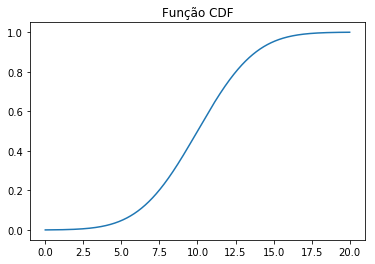

In [261]:
x = np.linspace(0, 20, num=1000)

f = lambda x: sct.norm.cdf(x, loc=10, scale=3)

cdf = f(x)

sns.lineplot(x, cdf);
plt.title('Função CDF')

In [262]:
#Para fazer a conta inversa, ou seja, qual o x que representa a probabilidade acumulada de x %
sct.norm.ppf(0.84, loc=media, scale=std)

9.988915766419506

In [263]:
#Para fazer a conta inversa, ou seja, qual o x que representa a 1 - probabilidade acumulada de x %
sct.norm.isf(0.16, loc=media, scale=std)

9.988915766419506

## Vamos aplicar o z score nos nossos dados

In [264]:
z_norm = (norm - media) / std

In [265]:
print("A Media do novos dados é", z_norm.mean())
print("A desvio padrão do novos dados é", z_norm.std())

A Media do novos dados é 0.06396791579386957
A desvio padrão do novos dados é 1.025055966305564


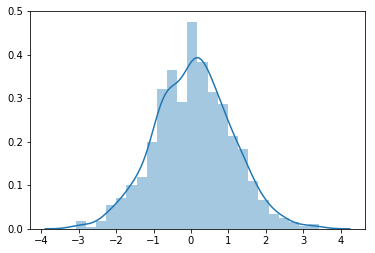

In [266]:
sns.distplot(z_norm)

In [278]:
#Vamos olhar para os dados normalizados e plotar o valor que tenha a probabilidade acumulada de 0.84
sct.norm.ppf(0.84, loc=0, scale=1)

0.994457883209753

In [279]:
#Vamos converter para os valores reais para verificar se estes batem com os resultados que ja obtivemos
(0.994457883209753 * std ) + media

9.988915766419506

## Distribuição Binomial

### Vamos modelar o resultado do lançamento de uma moeda 20 vezes para cima analisando uma das faces, sendo realizados 100000 experiementos

In [297]:
binom_20_05 = sct.binom.rvs(20, 0.5, size=100000) 

In [307]:
print("A média é : ", binom_20_05.mean())
print("O desvio padrão é : ", binom_20_05.std())

A média é :  10.01179
O desvio padrão é :  2.2346523210334084


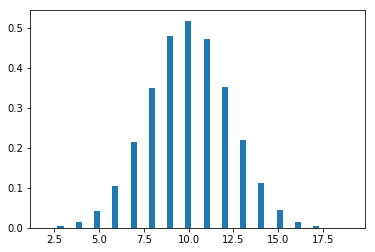

In [329]:
plt.hist(binom_20_05, density = True, bins = 50)
plt.show()

##### Qual a probabilidade de obtermos no máximo 3 caras (sucessos) em 20 lançamentos de uma moeda viciada, que tem probabilidade $0.50$ de sair cara?

In [331]:
sum((sct.binom.pmf(i, 20, 0.50) for i in range(4))) # Realiza exatamente o somatório mostrado acima.

0.001288414001464842

In [333]:
sct.binom.cdf(3, 20, 0.50)

0.0012884140014648435